# 20183221 응용소프트웨어공학과 차주형

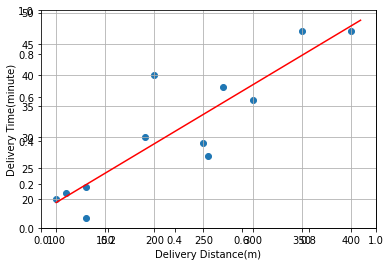

In [2]:
# 파이썬 코드를 통한 선형 회귀 알고리즘 프로그래밍

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

x = [110, 100, 300, 400, 130, 350, 200, 190, 130, 270, 255, 250]
y = [21, 20, 36, 47, 22, 47, 40, 30,17, 38, 27,29]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def predict_y(x):
    return slope * x + intercept

fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

ax1 = plt.scatter(x, y)
x1 = np.arange(100, 420, 10)
y1 = [predict_y(num) for num in x1]
ax2 = plt.plot(x1, y1, 'r')

plt.grid(True)
plt.xlabel('Delivery Distance(m)')
plt.ylabel('Delivery Time(minute)')
plt.show()

In [3]:
# 머신러닝 패키지를 활용한 선형 회귀 알고리즘 프로그래밍

from sklearn.linear_model import LinearRegression
x = [[110], [100], [300], [400], [130], [350],
     [200], [190], [130], [270], [255], [250]]

y = [21, 20, 36, 47, 22, 47, 40, 30, 17, 38, 27, 29]
model = LinearRegression()

fit_model = model.fit(x, y)
p_distance = int(input('예측하고 싶은 배달 거리를 입력하세요 : '))
p_time = fit_model.predict([[p_distance]])

print('%dm 거리의 예상 도착시간은 %d분 입니다.' % (p_distance, p_time))


예측하고 싶은 배달 거리를 입력하세요 : 280
280m 거리의 예상 도착시간은 36분 입니다.


In [4]:
# 파이썬 코드를 통한 K-NN 알고리즘 프로그래밍

from math import sqrt

distances = []


def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i]) ** 2
    
    return sqrt(distance)

def get_neighbors(train, test_row, num_neighbors):
    distance = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
        
    return neighbors

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    for neighbor in neighbors:
        print(neighbor)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

dataset = [[2,3,0],
          [1,2,0],
          [3,4,0],
          [1,2,1],
          [3,3,1],
          [8,3,1],
          [5,2,2],
          [7,2,2],
          [8,1,2],
          [7,4,2]]
test = [2,5,0]
K = 5

test_point = [2,5]
prediction = predict_classification(dataset, test_point, K)

print('기대 %d, 예측 %d'% (test[-1], prediction))





[2, 3, 0]
[1, 2, 0]
[3, 4, 0]
[1, 2, 1]
[3, 3, 1]
기대 0, 예측 0


In [5]:
# 머신러닝 패키지를 활용한 K-NN 알고리즘 프로그래밍
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris_dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
print("테스트 세트 정확도 :{:.3f}".format(knn.score(x_test, y_test)))

테스트 세트 정확도 :0.974
